In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [27]:
try:
    import google.colab
    # Load from remote URL
    df = pd.read_csv('https://box.hu-berlin.de/f/d0c59bb99af24dbf9c81/?dl=1', compression='zip', encoding='latin-1')    
except:
    # Load locally 
    df = pd.read_csv('crime.csv', encoding='latin-1')
    # df = pd.read_csv('https://box.hu-berlin.de/f/d0c59bb99af24dbf9c81/?dl=1', compression='zip', encoding='latin-1')    

# fill missing values
df.SHOOTING.fillna('N', inplace=True)

# Replace -1 values in Lat/Long with Nan
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)
#year = df.loc[[0],['YEAR']]
year = df[['YEAR']]
mean = year.mean()
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


<hr>

<div class="alert alert-block alert-success" style="margin-top: 20px">

# 2. Descriptive Statistics

1.  **Compute these statistics for all numerical columns**
    - Mean, Std-Dev, Min, Max
    
    
2. **Compute these statistics for all categorical columns**
    - Unique: the number of unique values    
    
</div>

In [12]:
df.describe().loc[['mean', 'std', 'min', 'max']]

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
mean,2317.546956,2016.560586,6.609719,13.118205,42.322300,-71.082851
std,1185.285543,0.996344,3.273691,6.294205,0.031883,0.029775
min,111.000000,2015.000000,1.000000,0.000000,42.232413,-71.178674
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-70.963676


In [26]:
df[['OFFENSE_CODE_GROUP', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'DAY_OF_WEEK', 'UCR_PART', 'STREET', 'Location']].describe().loc[['unique']]

,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Location
unique,67,12,879,2,233229,7,4,4657,18194


<hr>

<div class="alert alert-block alert-success" style="margin-top: 20px">

# 3. Key Questions
    
Your aim is to support the police by developing preventive measures based on historical data from 2015-2018.


1. **How has the total number of offences developed over the years?**
    - Which offences are the most frequent?
    - How has the number of serious crimes ('Part One') developed over the years?
    - Why is the total number of offences (so) low in 2015 and 2018?


2. **In which urban areas (district), broken down by year, were most crimes committed?**
    - In which urban areas (district) are most serious crimes ('Part One') committed? 
    - Which types of serious crimes ('Part One') occur most frequently in the urban area 'B2'? 


3. **Are there (a) times, (b) days or (c) months when more serious crimes ('Part One') occur?**
    - Do crimes tend to occur at night or during the day?
    - When are the most police officers needed?


4. **How has the number of shootings developed in recent years?**
    - In which district do most shootings take place?
    - In which street do most shootings take place?
    - At what times do most shootings take place?
    
</div>

<AxesSubplot:xlabel='YEAR'>

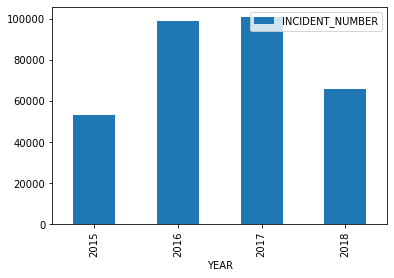

In [29]:
# Key Question 1:
# How has the total number of offences developed over the years?

# All Offences - total numbers and percent change:

pd.DataFrame(df.groupby("YEAR").INCIDENT_NUMBER.count()).plot(kind='bar')

In [70]:
changes = pd.DataFrame(df.groupby("YEAR").INCIDENT_NUMBER.count()).pct_change()
changes = changes.rename(columns={'INCIDENT_NUMBER': 'COMPARED_TO_LAST_YEAR'})
changes.index
changes.drop(2015)

,COMPARED_TO_LAST_YEAR
YEAR,
2016,0.856485
2017,0.017878
2018,-0.348919


,0,1
0,2015,INCIDENT_NUMBER OFFENSE_CODE OFFENSE_C...
1,2016,INCIDENT_NUMBER OFFENSE_CODE OFFENSE_C...
2,2017,INCIDENT_NUMBER OFFENSE_CODE OFFENS...
3,2018,INCIDENT_NUMBER OFFENSE_CODE OFFENS...


In [42]:
# Which offences are the most frequent?

df['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64